In [1]:
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
import utils
from importlib import reload
reload(utils)

<module 'utils' from '/home/amitaharoni/workspace/cv-sprint/models/utils.py'>

In [2]:
train_dl, valid_dl, test_dl, class_names = utils.make_cifar_dataloaders()

Files already downloaded and verified
Files already downloaded and verified


tulip


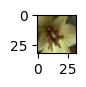

In [3]:
img, label = next(iter(test_dl))
id = 5
img = img[id].numpy().transpose([1,2,0])
fig, ax = plt.subplots(figsize=(0.5,0.5))
ax.imshow(img)
print(class_names[label[id]])
display()

In [4]:
class TestNetwork(torch.nn.Module):
    def __init__(self, class_num):
        super().__init__()
        self.backbone = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3),
            torch.nn.ReLU(),
            torch.nn.AdaptiveAvgPool2d(output_size=1),
        )
        self.head = torch.nn.Linear(in_features=16, out_features=class_num)

    def forward(self, x: torch.Tensor):
        x = self.backbone(x)
        x = x.view(-1, 16)
        x = self.head(x)
        return x


In [5]:
cifar_model = TestNetwork(100).to(utils.device)
cifar_model

TestNetwork(
  (backbone): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): AdaptiveAvgPool2d(output_size=1)
  )
  (head): Linear(in_features=16, out_features=100, bias=True)
)

In [6]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cifar_model.parameters())
utils.train_model(cifar_model, train_dl, valid_dl, loss_fn, optimizer, tensorboard_dir='../runs/00_silly', metrics=[utils.metric_accuracy], epochs=2)

100%|██████████| 79/79 [00:00<00:00, 175.60it/s]


Epoch 1/2: train_loss=4.5654, train_accuracy=0.0175, val_loss=4.4772, val_accuracy=0.0272
Saving params from epoch 1. Best loss: 4.4772


100%|██████████| 79/79 [00:00<00:00, 179.41it/s]

Epoch 2/2: train_loss=4.4019, train_accuracy=0.0317, val_loss=4.3355, val_accuracy=0.0412
Saving params from epoch 2. Best loss: 4.3355
Loading model params from epoch 2


TestNetwork(
  (backbone): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): AdaptiveAvgPool2d(output_size=1)
  )
  (head): Linear(in_features=16, out_features=100, bias=True)
)

In [7]:
utils.evaluate_model(cifar_model, test_dl, loss_fn, metrics=[utils.metric_accuracy])

{'loss': 4.329596880340576, 'accuracy': 0.0406}

In [7]:
train_dl, valid_dl, test_dl = utils.make_tiny_imagenet_dataloaders()

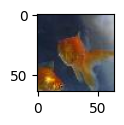

In [12]:
img, label = next(iter(test_dl))
id = 5
img = img[id].numpy().transpose([1,2,0])
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(img)
display()

In [8]:
tiny_imagenet_model = TestNetwork(200).to(utils.device)
tiny_imagenet_model

TestNetwork(
  (backbone): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): AdaptiveAvgPool2d(output_size=1)
  )
  (head): Linear(in_features=16, out_features=200, bias=True)
)

In [9]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(tiny_imagenet_model.parameters())
utils.train_model(tiny_imagenet_model, train_dl, valid_dl, loss_fn, optimizer, tensorboard_dir='../runs/00_silly', metrics=[utils.metric_accuracy], epochs=2)

100%|██████████| 157/157 [00:01<00:00, 155.83it/s]


Epoch 1/2: train_loss=5.2162, train_accuracy=0.0120, val_loss=5.1182, val_accuracy=0.0155
Saving params from epoch 1. Best loss: 5.1182


100%|██████████| 157/157 [00:01<00:00, 155.50it/s]

Epoch 2/2: train_loss=5.1019, train_accuracy=0.0175, val_loss=5.0722, val_accuracy=0.0206
Saving params from epoch 2. Best loss: 5.0722
Loading model params from epoch 2


TestNetwork(
  (backbone): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): AdaptiveAvgPool2d(output_size=1)
  )
  (head): Linear(in_features=16, out_features=200, bias=True)
)

In [10]:
utils.evaluate_model(tiny_imagenet_model, test_dl, loss_fn, metrics=[utils.metric_accuracy])

{'loss': 5.0740357025146485, 'accuracy': 0.0216}